<a href="https://colab.research.google.com/github/WesleyHung/comp3359-Emotion-Analysis/blob/master/v3_project_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comp3359 Project
# Emotion Analysis AI machine


Listed some styles of our machine here...
*   Text classification
*   Supervised learning
*   LSTM (Type of RNN)
*   Attention Mechanism (encoding/ decoding)



# Load the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Specify directory of course materials in Google Drive
module_dir = '/content/drive/My Drive/'

# Path to data file
#I put my dataset in my google drive, you can do so by copying from the sharing file
data_path = os.path.join(module_dir, 'text_emotion.csv')
  
#Loading the dataset into pandas DataFrame
data_df = pd.read_csv(data_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


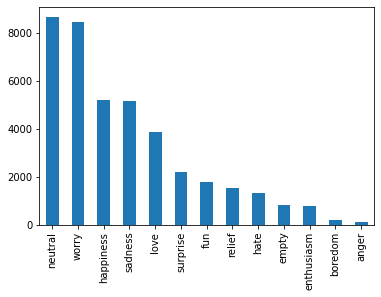

In [2]:
# Plot label histogram
data_df.sentiment.value_counts().plot.bar()

In [3]:
data_df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


Taking the only useful features/ prefix '@' (username) removel

In [4]:
data_df = data_df[['sentiment', 'content']]

for i in range(len(data_df)):
  new_data_df = list(data_df.content[i].split(" "))
  new_data_df = [x for x in new_data_df if not x.startswith('@')]
  data_df.content[i] = " ".join(new_data_df)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data_df

,sentiment,content
0,empty,i know i was listenin to bad habit earlier an...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,We want to trade with someone who has Houston ...
...,...,...
39995,neutral,
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY N...


## Halves the dataset that has too much emotion


In [0]:
#"""
worry_df = data_df.loc[data_df['sentiment']=='worry']
neutral_df = data_df.loc[data_df['sentiment']=='neutral']

# halves the amount of the dataframe
new_worry_size = len(worry_df)//2
new_neutral_size = len(neutral_df)//2

worry_df = worry_df.iloc[:new_worry_size]
neutral_df = neutral_df.iloc[:new_neutral_size]
#"""

In [0]:
#"""
#drop all the worry label and neutral label from the original dataframe first
data_df = data_df[data_df.sentiment != 'worry']
data_df = data_df[data_df.sentiment != 'neutral']
#"""

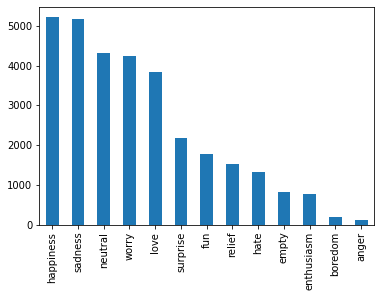

In [8]:
#"""
#insert the new worry and neutral datafreame back again
data_df = data_df.append(worry_df)
data_df = data_df.append(neutral_df)

data_df.sentiment.value_counts().plot.bar()
#"""

## Delete the dataset that has too few emotion

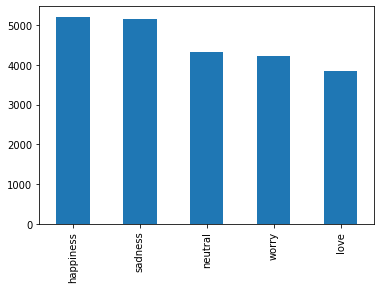

In [9]:
#drop all the label which has too few dataset
data_df = data_df[data_df.sentiment != 'anger']
data_df = data_df[data_df.sentiment != 'boredom']
data_df = data_df[data_df.sentiment != 'enthusiasm']
data_df = data_df[data_df.sentiment != 'empty']
data_df = data_df[data_df.sentiment != 'hate']
data_df = data_df[data_df.sentiment != 'relief']
data_df = data_df[data_df.sentiment != 'fun']
data_df = data_df[data_df.sentiment != 'surprise']

data_df.sentiment.value_counts().plot.bar()


# Separate Training/Test Dataset

## Global variable

In [0]:
# Random seed for all random process we will use.
RAND_SEED = 3359
# Size of training dataset (the rest, i.e., 20%,  will be test data)
TRAIN_SIZE = 0.8

## Seperate dataset

In [11]:
all_idx = list(range(len(data_df)))

# Shuffle the list of indices
import random
random.seed(RAND_SEED)
random.shuffle(all_idx)

# Split the random indices into two portion according 
# to the training size defined
p = int(len(data_df) * TRAIN_SIZE)
train_idx = all_idx[:p]
test_idx = all_idx[p:]

# Now, retrieve training/test data records from data_df 
# according to the indices we prepared in train_idx and test_idx
train_df = data_df.iloc[train_idx]
test_df = data_df.iloc[test_idx]

# However, since the original indices from data_df will be attached to 
# the retrieved records in train_df and test_df,
# we need to reset index so indices in train_df/test_df will start from 0 as usual
train_df = train_df.reset_index()
test_df = test_df.reset_index()

# Drop the automatically created "index" column
train_df = train_df.drop(['index'], axis=1)
test_df = test_df.drop(['index'], axis=1)

train_df

,sentiment,content
0,love,*HUGS* i'm sure they will
1,happiness,added 30 minutes to morning sleep by cutting o...
2,happiness,Watching the best movie ever: The NeverEnding ...
3,worry,now i am doing the MicroEconomics project iha...
4,neutral,"I've been well, thx. Just getting up for an ea..."
...,...,...
18206,sadness,Im sad right now becuz of my lady
18207,happiness,lay by the pool and take a nap. my agenda for ...
18208,neutral,no im not cries LOL
18209,love,Cause its true!!! It would!!! Hahaha... I Love...


# Preprossesing the data

## Tokenize 'content' using NLTK Treebank Word Tokenizer

In [0]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

for i in range(len(train_df)):

  train_word_tokens = tokenizer.tokenize(train_df.content[i])
  train_df['content'][i] = " ".join(train_word_tokens)
  
for i in range(len(test_df)):

  test_word_tokens = tokenizer.tokenize(test_df.content[i])
  test_df['content'][i] = " ".join(test_word_tokens)


In [13]:
train_df

,sentiment,content
0,love,*HUGS* i 'm sure they will
1,happiness,added 30 minutes to morning sleep by cutting o...
2,happiness,Watching the best movie ever : The NeverEnding...
3,worry,now i am doing the MicroEconomics project ihat...
4,neutral,"I 've been well , thx. Just getting up for an ..."
...,...,...
18206,sadness,Im sad right now becuz of my lady
18207,happiness,lay by the pool and take a nap. my agenda for ...
18208,neutral,no im not cries LOL
18209,love,Cause its true ! ! ! It would ! ! ! Hahaha ......


## Stopword Removal using NLTK

In [14]:
# The following code is to remove stop words from sentence using nltk
# Created by - ANALYTICS VIDHYA

# importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# set of stop words
stop_words = set(stopwords.words('english')) 

# If there are some stopwords you think that is important, insert them in below list
useful_stopwords = ['needn', "needn't", 'no', 'nor', 'not', 'now', 'aren', "aren't", 'couldn', 'mightn', 
                    "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', "couldn't",'off', 'd',
                    'did', 'didn', "didn't",'shan','against', "shan't",'should', "should've", 'shouldn',
                    "shouldn't",'very', 'was', 'wasn', "wasn't",'what', 'when', 'where','because', 'further',
                    'which', 'while', 'who', 'whom', 'will', 'with', 'won', "won't", 'wouldn','is', 'isn', "isn't", "wouldn't",
  'why', 'we', 'were', 'too', 'weren', "weren't", 'so', 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'had', 'hadn',
 "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't",'having',]

for w in useful_stopwords:
  stop_words.remove(w)
#stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# tokens of words
for i in range(len(train_df)):

  train_word_tokens = word_tokenize(train_df['content'][i])
  train_filtered_sentence = []
  
  for w in train_word_tokens: 
    if w not in stop_words: 
      train_filtered_sentence.append(w)
  train_df['content'][i] = " ".join(train_filtered_sentence)


for i in range(len(test_df)):

  test_word_tokens = word_tokenize(test_df['content'][i])
  test_filtered_sentence = []
  
  for w in test_word_tokens: 
    if w not in stop_words:
      test_filtered_sentence.append(w) 
  test_df['content'][i] = " ".join(test_filtered_sentence)


## Applying byte pair encoding to word segmentation on 'content'

In [16]:
# we use the folowwing module for word segmentation
!pip install subword-nmt

#extract the 'content' data as we only need the content to be segmented
train_df_content = train_df['content']
test_df_content = test_df['content']

f_df = open("df_content.txt", "a")

f_train = open("train_content.txt", "a")
for content in train_df_content:
  f_train.write(content + '\n')
  f_df.write(content + '\n')  # create the word band
f_train.close()

f_test = open("test_content.txt", "a")
for content in test_df_content:
  f_test.write(content + '\n')
  f_df.write(content + '\n')  # create the word band
f_test.close()

f_df.close()

In [0]:
num_operations= 32000

# parameteres for the following command 
codes_file = "/content/new_bpe.32000"
train_df_content = '/content/train_content.txt'
test_df_content = '/content/test_content.txt'

bpe_train_df_content = '/content/bpe_train_content.txt'
bpe_test_df_content = '/content/bpe_test_content.txt'

In [18]:
# learn sub-word from train and test data content
df_content = '/content/df_content.txt'
!subword-nmt learn-bpe -s {num_operations} < {df_content} > {codes_file}

no pair has frequency >= 2. Stopping


In [0]:
#start BPE word segmentation
!subword-nmt apply-bpe -c {codes_file} < {train_df_content} > {bpe_train_df_content}
!subword-nmt apply-bpe -c {codes_file} < {test_df_content} > {bpe_test_df_content}

In [0]:
f_train = open("bpe_train_df_content.txt", "a")
f_train.write('bpe_content\n')  # make a name for the data

f_train_content = open("bpe_train_content.txt", "r")
for content in f_train_content:
  f_train.write(content)
f_train_content.close()
f_train.close()



f_test = open("bpe_test_df_content.txt", "a")
f_test.write('bpe_content\n')   # make a name for the data

f_test_content = open("bpe_test_content.txt", "r")

for content in f_test_content:
  f_test.write(content)
f_test_content.close()
f_test.close()


In [21]:
# convert .txt format back to .csv format
bpe_train_content_df = pd.read_fwf('bpe_train_df_content.txt')
bpe_train_content_df = bpe_train_content_df[['bpe_content']]

bpe_test_content_df = pd.read_fwf('bpe_test_df_content.txt')
bpe_test_content_df = bpe_test_content_df[['bpe_content']]

#merge them back to dataframe format
train_df['bpe_content'] = bpe_train_content_df
test_df['bpe_content'] = bpe_test_content_df

#convert them to string type
train_df.bpe_content = train_df.bpe_content.astype(str)
test_df.bpe_content = test_df.bpe_content.astype(str)

train_df.dtypes

sentiment      object
content        object
bpe_content    object
dtype: object

,sentiment,content,bpe_content
0,love,*HUGS* 'm sure will,*HUGS* 'm sure will
1,happiness,added 30 minutes morning sleep cutting useless...,added 30 minutes morning sleep cutting useless...
2,happiness,Watching best movie ever : The NeverEnding Sto...,Watching best movie ever : The Never@@ En@@ di...
3,worry,now doing MicroEconomics project ihate subject...,now doing Mic@@ ro@@ Economics project i@@ hat...
4,neutral,"I 've well , thx . Just getting early morning ...","I 've well , thx . Just getting early morning ..."
...,...,...,...
18206,sadness,Im sad right now becuz my lady,Im sad right now becuz my lady
18207,happiness,lay pool take nap . my agenda day,lay pool take nap . my agenda day
18208,neutral,no im not cries LOL,no im not cries LOL
18209,love,Cause true ! ! ! It would ! ! ! Hahaha ... I L...,Cause true ! ! ! It would ! ! ! Hahaha ... I L...


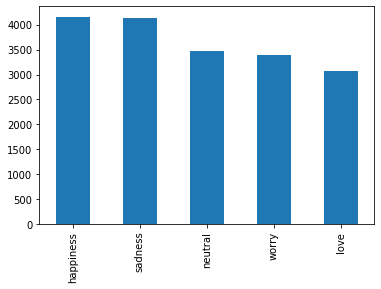

In [22]:
train_df.sentiment.value_counts().plot.bar()
train_df

,sentiment,content,bpe_content
0,love,"Nice place eat sao paulo , brazil http : //twi...","Nice place eat sao paulo , brazil http : //twi..."
1,happiness,got ta go twitterers ( ? ) my stupid sister wa...,got ta go twitterers ( ? ) my stupid sister wa...
2,happiness,good luck chan ! gue kmrn bawa backpack kosong...,good luck chan ! gue k@@ mr@@ n ba@@ wa backpa...
3,sadness,I played latter parts voodoo village part co-o...,I played latter parts voodoo village part co-@...
4,happiness,'ve heard Basment Jaxx 's new song & quot ; Ra...,'ve heard Bas@@ ment Ja@@ xx 's new song & quo...
...,...,...,...
4548,love,"home ; had yogurt factory , love yogurt also h...","home ; had yogurt factory , love yogurt also h..."
4549,worry,has spent last two weeks attempting grow beard...,has spent last two weeks attempting grow beard...
4550,neutral,haha wish could ! I look like little boy now,haha wish could ! I look like little boy now
4551,neutral,bank holiday today,bank holiday today


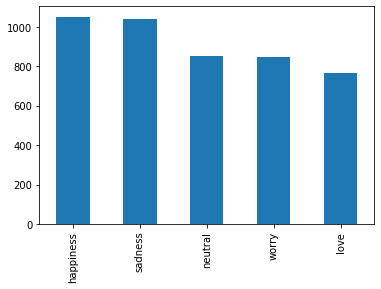

In [23]:
test_df.sentiment.value_counts().plot.bar()
test_df

## Label the emotions as target

In [0]:
labels = train_df["sentiment"].values.tolist()
val_labels = test_df["sentiment"].values.tolist()

## Creating list of emotions

In [25]:
label2id = dict()
label2id = {l: i for i, l in enumerate(set(labels))}
print(label2id)
id2label = {v: k for k, v in label2id.items()}
print(id2label)

{'happiness': 0, 'worry': 1, 'love': 2, 'neutral': 3, 'sadness': 4}
{0: 'happiness', 1: 'worry', 2: 'love', 3: 'neutral', 4: 'sadness'}


## Encoding the training dataset and validation dataset

In [26]:
max_words = 0 # maximum number of words in a sentence

word2id = dict()

# Construction of word2id dict
for content in train_df.bpe_content:
    for word in content:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(content) > max_words:
        max_words = len(content)

for content in test_df.bpe_content:
    for word in content:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(content) > max_words:
        max_words = len(content)

max_words

147

## Encoding train(content) and labels(sentiment) to corresponing integer values

In [27]:
#reference to the online material
import keras

# Encode input words and labels
train = [[word2id[word] for word in sentence] for sentence in train_df.content]
val = [[word2id[word] for word in sentence] for sentence in test_df.content]
Y = [label2id[label] for label in labels]
val_Y = [label2id[label] for label in val_labels]

# Apply Padding to X
from keras.preprocessing.sequence import pad_sequences
train = pad_sequences(train, max_words)
val = pad_sequences(val, max_words)

# Convert Y to numpy array
Y = keras.utils.to_categorical(Y, num_classes=len(label2id), dtype='float32')
val_Y = keras.utils.to_categorical(val_Y, num_classes=len(label2id), dtype='float32')

# Print shapes
print("Shape of train: {}".format(train.shape))
print("Shape of Y: {}".format(Y.shape))
print("-------------")
print("Shape of val: {}".format(val.shape))
print("Shape of val_Y: {}".format(val_Y.shape))
print("-------------")
print(len(word2id))

Using TensorFlow backend.


Shape of train: (18211, 147)
Shape of Y: (18211, 5)
-------------
Shape of val: (4553, 147)
Shape of val_Y: (4553, 5)
-------------
97


This is referencing to tensorflow tutorial

In [0]:
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing import text

# Vectorization parameters
# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Limit on the length of text sequences. Sequences longer than this
# will be truncated.
MAX_SEQUENCE_LENGTH = 500

def sequence_vectorize(train_texts, val_texts):
    """Vectorizes texts as sequence vectors.

    1 text = 1 sequence vector with fixed length.

    # Arguments
        train_texts: list, training text strings.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val, word_index: vectorized training and validation
            texts and word index dictionary.
    """

    # Create vocabulary with training texts.
    tokenizer = text.Tokenizer(num_words=TOP_K, filters='"#$%&()*+,-/:;<=>[\\]^_`{|}~\t\n')
    tokenizer.fit_on_texts(train_texts)

    # Vectorize training and validation texts.
    x_train = tokenizer.texts_to_sequences(train_texts)
    x_val = tokenizer.texts_to_sequences(val_texts)

    print(x_train[1])

    # Get max sequence length.
    max_length = len(max(x_train, key=len))
    
    if max_length > MAX_SEQUENCE_LENGTH:
      max_length = MAX_SEQUENCE_LENGTH
    
    # Fix sequence length to max value. Sequences shorter than the length are
    # padded in the beginning and sequences longer are truncated
    # at the beginning.
    x_train = sequence.pad_sequences(x_train, maxlen=max_length)
    x_val = sequence.pad_sequences(x_val, maxlen=max_length)
    return x_train, x_val, tokenizer.word_index, max_length

In [29]:
#tokenize the train dataset and test dataset 
train, val, word_index, max_words = sequence_vectorize(train_df['bpe_content'], test_df['bpe_content'])

[2777, 435, 630, 76, 113, 2778, 3903, 29, 135, 2, 570, 94]


In [30]:
# view the result
print(train[10])
print(train_df.bpe_content[10])
max_words

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  247    4  109   53    5  113    1
  533 4582 2559 7235 3905   15 2780]
On my way home ... SLEEP ! Seeing Amber Pac@@ ific tomorow with besties


63

# Hyperparameter (HERE!!!)

In [0]:
""" Hyperparameters """
# Size of data batches
BATCH_SIZE = 47
# Dimension of Word Embedding layer
EMBEDDING_DIM = 100
# Number of epochs to train model
N_EPOCH = 10
# Size of sequence vector
MAX_WORDS = max_words

#Global variable of train dataset and test dataset
TRAIN_DS = train
EVAL_DS = val

# Build LSTM model with attention

In [32]:
#imports we know we'll need
!pip install scikit-optimize
import skopt
from skopt import gbrt_minimize, gp_minimize
from skopt.utils import use_named_args
from skopt.space import Real, Categorical, Integer  

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow
from tensorflow.python.keras import backend as K

     |████████████████████████████████| 81kB 2.1MB/s 


In [0]:
dim_learning_rate = Real(low=1e-4, high=1e-2, prior='log-uniform',
                         name='learning_rate')
dim_num_dense_layers = Integer(low=1, high=5, name='num_dense_layers')
dim_num_input_nodes = Integer(low=1, high=512, name='num_input_nodes')
dim_num_dense_nodes = Integer(low=1, high=28, name='num_dense_nodes')
dim_activation = Categorical(categories=['relu', 'sigmoid'],
                             name='activation')
dim_batch_size = Integer(low=1, high=128, name='batch_size')
dim_adam_decay = Real(low=1e-6,high=1e-2,name="adam_decay")

dimensions = [dim_learning_rate,
              dim_num_dense_layers,
              dim_num_input_nodes,
              dim_num_dense_nodes,
              dim_activation,
              dim_batch_size,
              dim_adam_decay
             ]
default_parameters = [1e-3, 1,512, 13, 'relu',47, 1e-3]


## Build our own Attantion layer

In [0]:
#we create our own Attention layer for use 
#Reference from https://www.kaggle.com/takuok/bidirectional-lstm-and-attention-lb-0-043

from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints


def dot_product(x, kernel):

    """

    Wrapper for dot product operation, in order to be compatible with both

    Theano and Tensorflow

    Args:

        x (): input

        kernel (): weights

    Returns:

    """

    if K.backend() == 'tensorflow':

        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)

    else:

        return K.dot(x, kernel)

    
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

## RNN model (temp prototype)

In [0]:


from keras.optimizers import Adam
def create_rnn_model(learning_rate, num_dense_layers,num_input_nodes,
                 num_dense_nodes, activation, adam_decay):
  # rnn model reference to COMP3359 M4
  rnn_model = keras.Sequential([
      keras.layers.Embedding(len(train) + 1,
                            EMBEDDING_DIM,
                            input_length=max_words),
      keras.layers.Bidirectional(keras.layers.LSTM(EMBEDDING_DIM)),
      keras.layers.Dense(EMBEDDING_DIM, activation='relu'),
      keras.layers.Dense(len(label2id), activation='softmax')
  ])

  #setup our optimizer and compile
  adam = Adam(lr=learning_rate, decay= adam_decay)
  rnn_model.compile(loss="categorical_crossentropy", optimizer=adam,
                        metrics=['acc'])
  return rnn_model



In [0]:
@use_named_args(dimensions=dimensions)
def fitness(learning_rate, num_dense_layers, num_input_nodes, 
            num_dense_nodes,activation, batch_size,adam_decay):

    model = create_rnn_model(learning_rate=learning_rate,
                         num_dense_layers=num_dense_layers,
                         num_input_nodes=num_input_nodes,
                         num_dense_nodes=num_dense_nodes,
                         activation=activation,
                         adam_decay=adam_decay
                        )
    

    #named blackbox becuase it represents the structure
    blackbox = model.fit(x=TRAIN_DS,
                        y=Y,
                        epochs=1,
                        batch_size=batch_size,
                        validation_split=0.15,
                        )
    #return the validation accuracy for the last epoch.
    accuracy = blackbox.history['val_acc'][-1]

    # Print the classification accuracy.
    print()
    print("Accuracy: {0:.2%}".format(accuracy))
    print()


    # Delete the Keras model with these hyper-parameters from memory.
    del model
    
    # Clear the Keras session, otherwise it will keep adding new
    # models to the same TensorFlow graph each time we create
    # a model with a different set of hyper-parameters.
    K.clear_session()
    tensorflow.compat.v1.reset_default_graph()
    
    # the optimizer aims for the lowest score, so we return our negative accuracy
    return -accuracy

In [0]:
gp_result = gp_minimize(func=fitness,
                            dimensions=dimensions,
                            n_calls=12,
                            noise= 0.01,
                            n_jobs=-1,
                            kappa = 5,
                            x0=default_parameters)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 27002 samples, validate on 4766 samples
Epoch 1/1
27002/27002 [==============================] - 122s 5ms/step - loss: 1.9976 - acc: 0.2972 - val_loss: 1.9212 - val_acc: 0.3282

Accuracy: 32.82%

Train on 27002 samples, validate on 4766 samples
Epoch 1/1
27002/27002 [==============================] - 89s 3ms/step - loss: 1.9684 - acc: 0.3134 - val_loss: 1.9098 - val_acc: 0.3332

Accuracy: 33.32%

Train on 27002 samples, validate on 4766 samples
Epoch 1/1
27002/27002 [==============================] - 83s 3ms/step - loss: 2.1595 - acc: 0.2285 - val_loss: 2.1107 - val_acc: 0.2465

Accuracy: 24.65%

Train on 27002 samples, validate on 4766 samples
Epoch 1/1
27002/27002 [==============================] - 113s 4ms/step - loss: 2.1013 - acc: 0.2494 - val_loss: 2.0409 - val_acc: 0.2738

Accuracy: 27.38%

Train on 27002 samples, validate on 4766 samples
Epoch 1/1
27002/27002 [==============================] - 95s 4ms/step - loss: 2.1167 - acc: 0.2439 - val_loss: 2.0751 - val_acc: 0.25

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 27002 samples, validate on 4766 samples
Epoch 1/1
27002/27002 [==============================] - 7547s 279ms/step - loss: 2.1270 - acc: 0.2124 - val_loss: 2.1237 - val_acc: 0.2119

Accuracy: 21.19%



          fun: -0.34452369809150696
    func_vals: array([-0.32815778, -0.33319345, -0.24653798, -0.27381453, -0.25828788,
       -0.24653798, -0.34263533, -0.3445237 , -0.25157365, -0.29521611,
       -0.3218632 , -0.21191776])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.01, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=979007326), GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.01, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=979007326)]
 random_state: RandomState(MT19937) at 0x7FDF3DD3F678
        space: Space([Real(lo

In [0]:
tuple(gp_result.x)

(0.00692319229704878, 2, 98, 28, 'relu', 47, 0.008121572534969852)

## LSTM/Attention model

In [0]:
from keras.optimizers import Adam


# LSTM & Attention Model referencing from Kaggle tutorial
def create_LSTM_model(learning_rate, num_dense_layers,num_input_nodes,
                 num_dense_nodes, activation, adam_decay, max_words = MAX_WORDS):

  # Define input tensor
  sequence_input = keras.Input(shape=(max_words,), dtype='int32')

  # Word embedding layer
  embedded_inputs =keras.layers.Embedding(len(train) + 1,
                                          EMBEDDING_DIM,
                                          input_length=max_words)(sequence_input)

  # Apply dropout to prevent overfitting
  embedded_inputs = keras.layers.Dropout(0.2)(embedded_inputs)

  # Apply Bidirectional LSTM over embedded inputs
  lstm_outs = keras.layers.wrappers.Bidirectional(
      keras.layers.LSTM(EMBEDDING_DIM, return_sequences=True, recurrent_dropout=0.2)
  )(embedded_inputs)


  # Attention Mechanism - Generate attention vectors
  input_dim = int(lstm_outs.shape[2])
  attention_output = Attention(max_words)(lstm_outs)
  """
  #permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
  attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
  attention_vector = keras.layers.Reshape((max_words,))(attention_vector)
  attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
  attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])
  """

  # Last layer: fully connected with softmax activation
  fc = keras.layers.Dense(EMBEDDING_DIM, activation='relu')(attention_output)
  fc = keras.layers.Dropout(0.25)(fc)
  output = keras.layers.Dense(len(label2id), activation='softmax')(fc)

  # Finally building model
  model = keras.Model(inputs=[sequence_input], outputs=output)
  adam = Adam(lr=learning_rate, decay= adam_decay)
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=adam)

  return model



# Train the model

## Train the LSTM/Attention Model. 
If you are to test the hyperparameters, you can try on the prototype which cost fewer time.

In [0]:
gp_result_x = [0.00692319229704878, 2, 98, 28, 'relu', 47, 0.008121572534969852]
batch_size = gp_result_x.pop(5)

hyperparameter = tuple(gp_result_x)

In [57]:
# Print model summary
#model = create_LSTM_model(*hyperparameter)
#model.summary()

history = model.fit(train, Y, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_split=0.1, shuffle=True)


Train on 16389 samples, validate on 1822 samples
Epoch 1/10
16389/16389 [==============================] - 67s 4ms/step - loss: 1.3591 - accuracy: 0.3945 - val_loss: 1.2843 - val_accuracy: 0.4533
Epoch 2/10
16389/16389 [==============================] - 68s 4ms/step - loss: 1.0905 - accuracy: 0.5389 - val_loss: 1.3036 - val_accuracy: 0.4501
Epoch 3/10
16389/16389 [==============================] - 68s 4ms/step - loss: 0.8928 - accuracy: 0.6491 - val_loss: 1.4237 - val_accuracy: 0.4402
Epoch 4/10
16389/16389 [==============================] - 67s 4ms/step - loss: 0.7223 - accuracy: 0.7284 - val_loss: 1.5945 - val_accuracy: 0.4248
Epoch 5/10
16389/16389 [==============================] - 68s 4ms/step - loss: 0.5986 - accuracy: 0.7844 - val_loss: 1.7418 - val_accuracy: 0.4254
Epoch 6/10
16389/16389 [==============================] - 67s 4ms/step - loss: 0.5081 - accuracy: 0.8194 - val_loss: 1.9408 - val_accuracy: 0.4144
Epoch 7/10
16389/16389 [==============================] - 67s 4ms/ste

## Train the prototype (temp)

In [0]:
# fit for rnn model (temp) provided in the course
rnn_model = create_rnn_model(*hyperparameter)
temp = rnn_model.fit(train, Y, epochs=10, batch_size=BATCH_SIZE, validation_split=0.1, shuffle=True)

In [0]:
import torch
from torchvision import datasets, models, transforms

model_save_name = "lstm_attention_v3_trained.h5" 
path = F"/content/drive/My Drive/Colab Notebooks/{model_save_name}" 
model.save(path)

## Get the existing models

If you want to use the existing model, I've already store it in our shared file. 

In [64]:
"""
!pip install gdown==3.6.0

v1_id = "1M1VxKSiCgecAkogInyEwc4Phx3b9PzbF"
v2_id = "1-AbA0OevJmKWaknYsmGRSfYzwsM7IlU2"
v2.1_id = ""
v2.2_id = ""
v3_id = "1iBLelXS9Bw0_iKtoTPKMn7FIIP7Po7z4"

#!gdown https://drive.google.com/uc?id={v1_id}  #v1_model
#!gdown https://drive.google.com/uc?id={v2_id}  #v2_model
#!gdown https://drive.google.com/uc?id={v3_id}  #v3_model
"""

'\n!pip install gdown==3.6.0\n\nv1_id = "1M1VxKSiCgecAkogInyEwc4Phx3b9PzbF"\nv2_id = "1-AbA0OevJmKWaknYsmGRSfYzwsM7IlU2"\nv2.1_id = ""\nv2.2_id = ""\nv3_id = "1iBLelXS9Bw0_iKtoTPKMn7FIIP7Po7z4"\n\n#!gdown https://drive.google.com/uc?id={v1_id}  #v1_model\n#!gdown https://drive.google.com/uc?id={v2_id}  #v2_model\n#!gdown https://drive.google.com/uc?id={v3_id}  #v3_model\n'

In [0]:
"""
import keras
model_from_drive = keras.models.load_model('lstm_attention_v1_trained.h5')
"""

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


# Testing and predicting

## Test

This is the test result for our model

In [59]:
# Re-evaluate the model
loss, val_accuracy = model.evaluate(val, val_Y, verbose=2)
#loss, val_accuracy = rnn_model.evaluate(val, val_Y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*val_accuracy))

Restored model, accuracy: 39.53%


### Analysis on the network topology (not really considered optimization but is obviously very important)

We can plot the accuracy and loss function as a function of epochs for the training and test sets to see how the network performed.

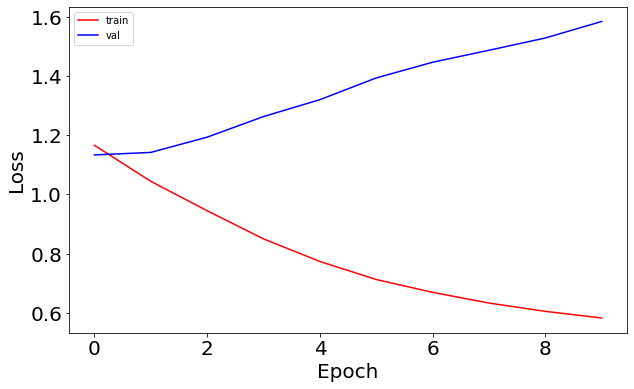

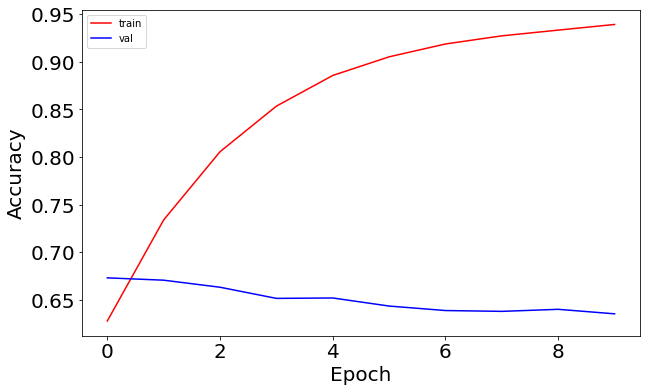

In [60]:
import matplotlib.pyplot as plt

# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
#ax.plot(np.sqrt(temp.history['loss']), 'r', label='train')
#ax.plot(np.sqrt(temp.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_accuracy']), 'b' ,label='val')
#ax.plot(np.sqrt(temp.history['acc']), 'r', label='train')
#ax.plot(np.sqrt(temp.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

## Predict

In [0]:
# Re-create the model to get attention vectors as well as label prediction
model_with_attentions = keras.Model(inputs=model.input,
                                    outputs=[model.output, 
                                             model.get_layer('attention_vec').output])

"""
# If you just use the downloaded model wothout trained yourself, please use here:
model_with_attentions = keras.Model(inputs=model_from_drive.input,
                                    outputs=[model_from_drive.output, 
                                             model_from_drive.get_layer('attention_vec').output])
"""

"\n# If you just use the downloaded model wothout trained yourself, please use here:\nmodel_with_attentions = keras.Model(inputs=model_from_drive.input,\n                                    outputs=[model_from_drive.output, \n                                             model_from_drive.get_layer('attention_vec').output])\n"

In [0]:
import random
import math

# Select random samples to illustrate
sample_text = "what are you doing"
sample_text = sample_text.lower()
#sample_text = random.choice(val)


# Encode samples
tokenized_sample = sample_text.split(" ")
encoded_samples = [[word_index[word] for word in tokenized_sample]]

# Padding
encoded_samples = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)

#encoded_samples = sample_text
#print(encoded_samples.shape)
# Make predictions
label_probs, attentions = model_with_attentions.predict(encoded_samples)
label_probs = {id2label[_id]: prob for (label, _id), prob in zip(label2id.items(),label_probs[0])}

# Get word attentions using attenion vector
token_attention_dic = {}
max_score = 0.0
min_score = 0.0
for token, attention_score in zip(tokenized_sample, attentions[0][-len(tokenized_sample):]):
    token_attention_dic[token] = math.sqrt(attention_score)


# VISUALIZATION
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
    
def attention2color(attention_score):
    r = 255 - int(attention_score * 255)
    color = rgb_to_hex((255, r, r))
    return str(color)
    
# Build HTML String to viualize attentions
html_text = "<hr><p style='font-size: large'><b>Text:  </b>"
for token, attention in token_attention_dic.items():
    html_text += "<span style='background-color:{};'>{} <span> ".format(attention2color(attention),
                                                                        token)
html_text += "</p>"
# Display text enriched with attention scores 
display(HTML(html_text))

# PLOT EMOTION SCORES
emotions = [label for label, _ in label_probs.items()]
scores = [score for _, score in label_probs.items()]
plt.figure(figsize=(5,2))
plt.bar(np.arange(len(emotions)), scores, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan', "purple"])
plt.xticks(np.arange(len(emotions)), emotions)
plt.ylabel('Scores')
plt.show()


NameError: ignored

In case the above chart is hard to see, here is the list of proboabilities showing the likeliness of emotions.

In [0]:
import operator

# create a list of emotion in decending order of their probability 
emotion_list=[]

for  _, emotion in enumerate(label_probs):
    temp = [emotion, label_probs[emotion]]
    emotion_list.append(temp)

sorted(emotion_list, key=operator.itemgetter(1), reverse= True)

[['worry', 0.35792974],
 ['neutral', 0.260627],
 ['sadness', 0.226002],
 ['surprise', 0.09963546],
 ['hate', 0.024357434],
 ['empty', 0.013586671],
 ['love', 0.011085417],
 ['relief', 0.0026744956],
 ['boredom', 0.0013502156],
 ['enthusiasm', 0.0011065771],
 ['anger', 0.0008735581],
 ['happiness', 0.00047115175],
 ['fun', 0.0003002882]]

# Main issue with the model performance

* val_accuracy not improving
* val_accuracy decreacing and cal_loss increasing --> overfitting

# Serveral gusses of improving the model 

*   half the data with labels of many dataset (done)
*   cut out the label with too few dataset (done)
*   using sub-wording tokenization (done)
*   hyperparameter tuning
*   NOT CONVERGE
*   model achtecture re-design
*   remove stop words (e.g. there, is, a, ...) (done)
*   tag name (with prefix '@') removal (done)

